In [1]:
import numpy as np
import cupy as cp
from utils import load_images
from utils import load_as_np
from utils import convert_np_to_cp
from rate_track import stack_images
from background import apply_bkg_to_images
from background import find_background
# Loaded in images in CuPy arrays
unprocessed_images_cupy = load_images('SatSimFITS')
unprocessed_images_numpy = load_as_np('SatSimFITS')
initial_stack = stack_images(unprocessed_images_cupy, np.array([0, 0]))
bkg = find_background(unprocessed_images_numpy[0])
backgroundless_images =  convert_np_to_cp(apply_bkg_to_images(unprocessed_images_numpy, bkg))


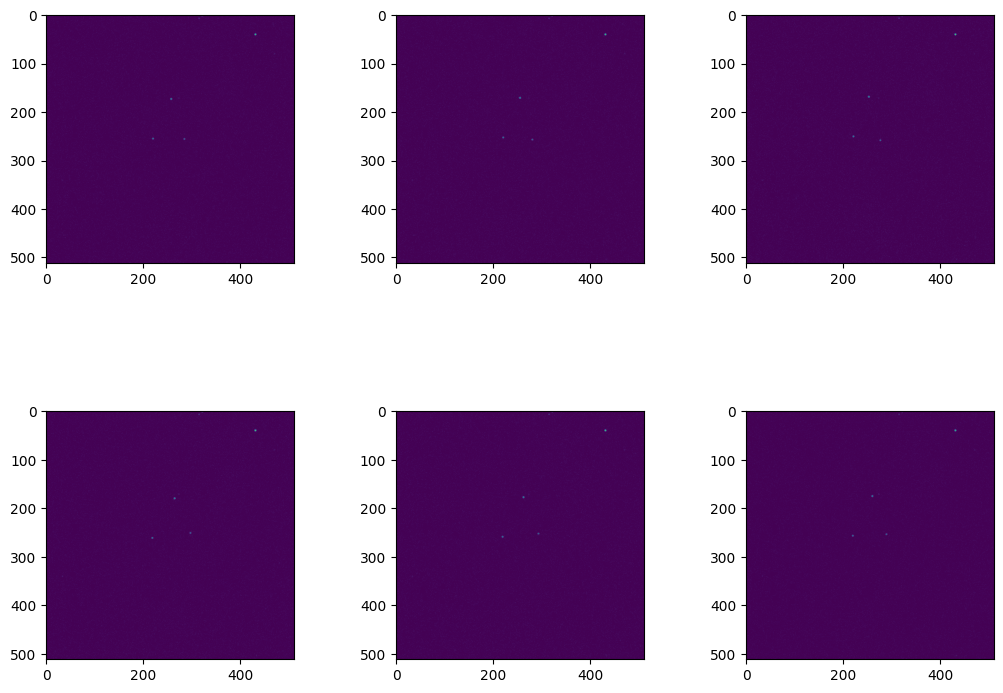

In [6]:
import matplotlib.pyplot as plt
from utils import zscale

plt.rcParams["figure.figsize"] = [14.00, 16.00]
plt.rcParams["figure.autolayout"] = True

row_counter = 1
column_counter = 1

for image in star_suppressed:
    plt.subplot(row_counter, 4, column_counter)
    plt.imshow(cp.ndarray.get(image))
    column_counter += 1
    if column_counter > 3:
        column_counter = 1
        row_counter += 1

In [3]:
from astrometric_localization import detect_stars, match_to_catalogue, skycoord_to_pixels, solution_to_image_coords, apply_starmask

stars = detect_stars(cp.ndarray.get(stack_images(backgroundless_images, cp.asarray([0, 0]))))
astrometric_solution = match_to_catalogue(stars)
s_list = solution_to_image_coords(stars, skycoord_to_pixels(astrometric_solution))[1]
star_suppressed = convert_np_to_cp(apply_starmask(s_list, initial_stack, backgroundless_images))


In [4]:
from rate_track import rate_tracked_info
results = rate_tracked_info('SatSimFITS', 1000)

TypeError: descriptor 'get' for 'cupy._core.core._ndarray_base' objects doesn't apply to a 'NoneType' object